In [1]:
# === CARGA DE LIBRERÍAS NECESARIAS (UNA SOLA VEZ) ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

# Modelos avanzados
import xgboost as xgb

# Manejo de imbalance
from imblearn.over_sampling import SMOTE

# Otras utilidades
import shap
import joblib
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# === CARGA DEL DATASET ORIGINAL ===
# Download datasets using wget command
!wget https://github.com/JoserraSASG/TFM_UCM/raw/main/Impact_of_Remote_Work_on_Mental_Health.csv
df = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")
print(df.shape)

--2025-02-17 11:15:18--  https://github.com/JoserraSASG/TFM_UCM/raw/main/Impact_of_Remote_Work_on_Mental_Health.csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoserraSASG/TFM_UCM/main/Impact_of_Remote_Work_on_Mental_Health.csv [following]
--2025-02-17 11:15:19--  https://raw.githubusercontent.com/JoserraSASG/TFM_UCM/main/Impact_of_Remote_Work_on_Mental_Health.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 598566 (585K) [text/plain]
Saving to: ‘Impact_of_Remote_Work_on_Mental_Health.csv’

Impact_of_Remote_Wo 100%[===================>] 584.54K  --.-KB/s    in 0.03s   

2025-02-17 11:15:1

In [2]:
# 2. CREAMOS LAS VARIABLES Health_Disease y Remote_Work
df['Health_Disease'] = df['Mental_Health_Condition'].apply(lambda x: 'Yes' if x in ['Depression', 'Anxiety', 'Burnout'] else 'No')
df['Remote_Work'] = df['Work_Location'].apply(lambda x: 'Yes' if x == 'Remote' else 'No')

print(df)

     Employee_ID  Age      Gender           Job_Role    Industry  \
0        EMP0001   32  Non-binary                 HR  Healthcare   
1        EMP0002   40      Female     Data Scientist          IT   
2        EMP0003   59  Non-binary  Software Engineer   Education   
3        EMP0004   27        Male  Software Engineer     Finance   
4        EMP0005   49        Male              Sales  Consulting   
...          ...  ...         ...                ...         ...   
4995     EMP4996   32        Male              Sales  Consulting   
4996     EMP4997   39      Female              Sales  Healthcare   
4997     EMP4998   42      Female              Sales  Healthcare   
4998     EMP4999   27      Female              Sales  Healthcare   
4999     EMP5000   29        Male                 HR          IT   

      Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                      13        Hybrid                     47   
1                       3        Remote            

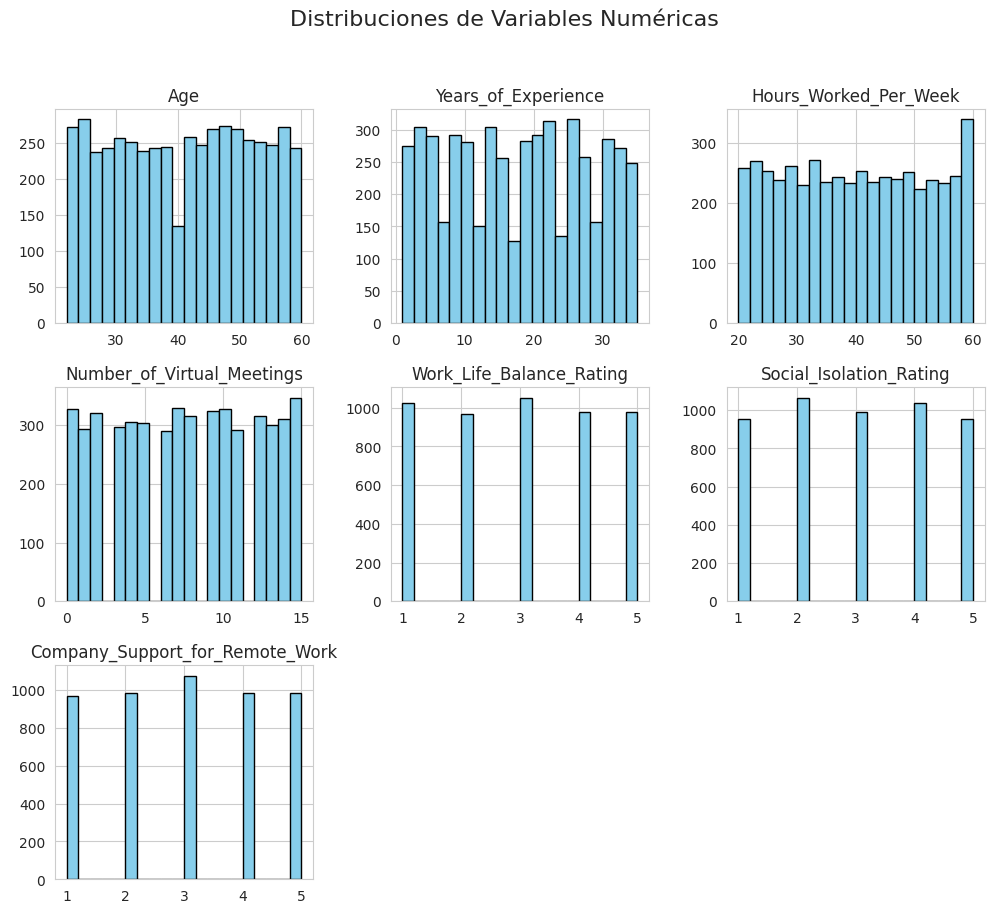

<ipython-input-3-58ea112a345d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')


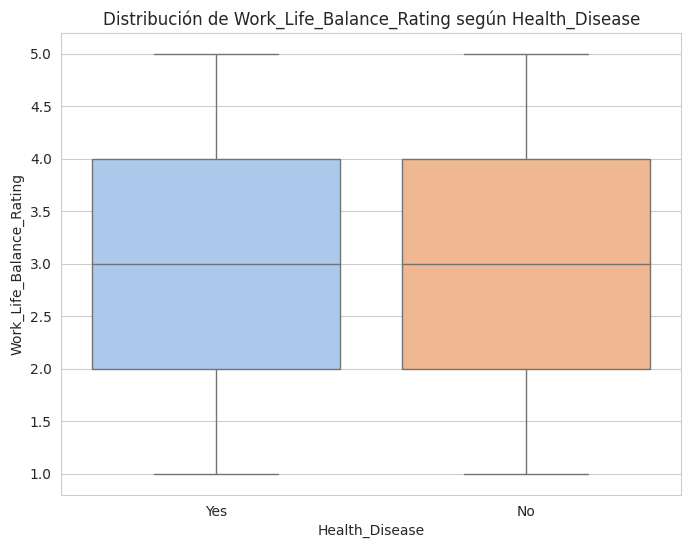

<ipython-input-3-58ea112a345d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')


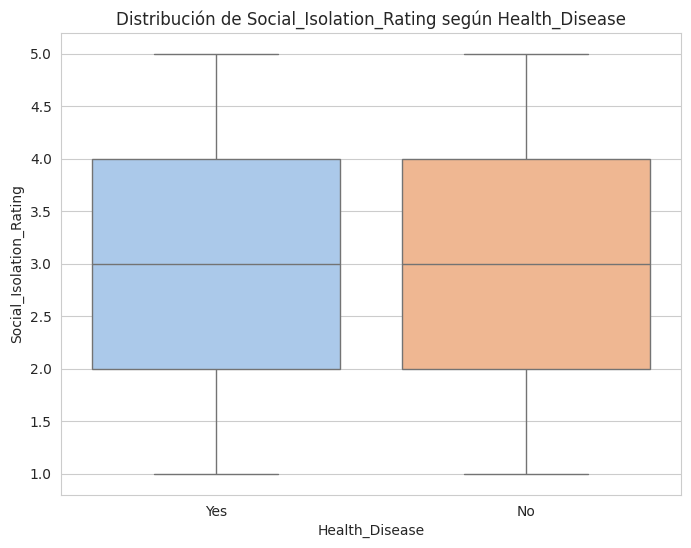

<ipython-input-3-58ea112a345d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')


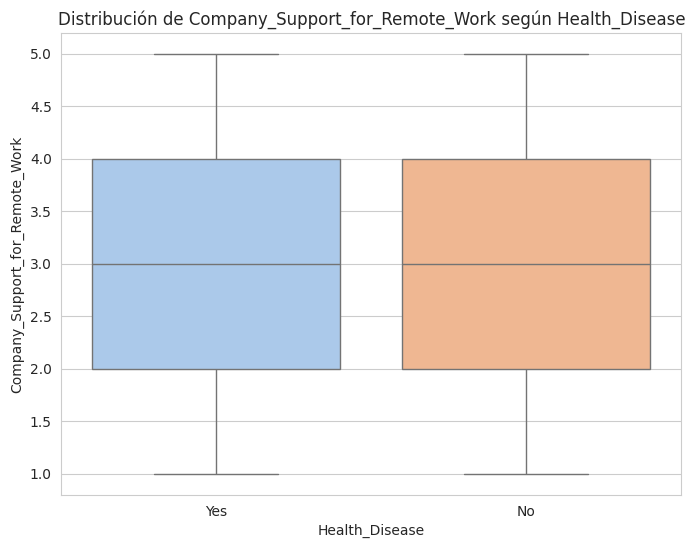

<ipython-input-3-58ea112a345d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')


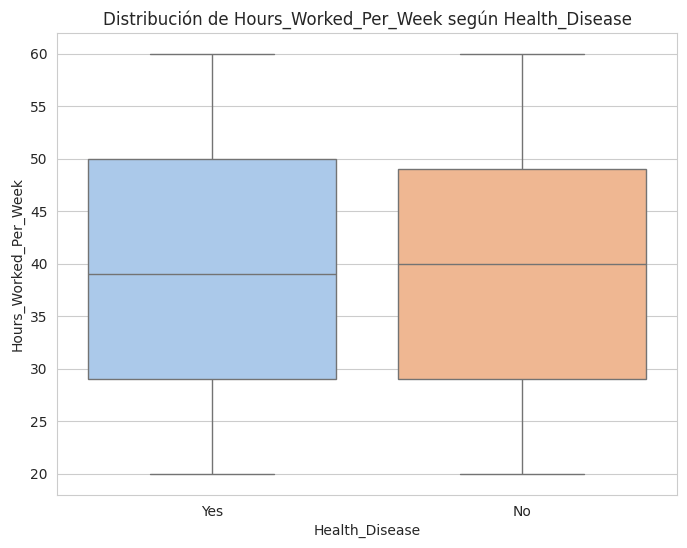

<ipython-input-3-58ea112a345d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')


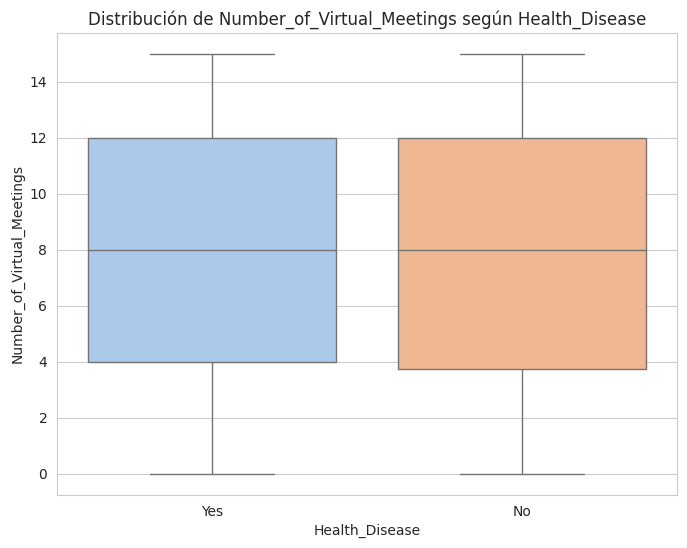

<ipython-input-3-58ea112a345d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')


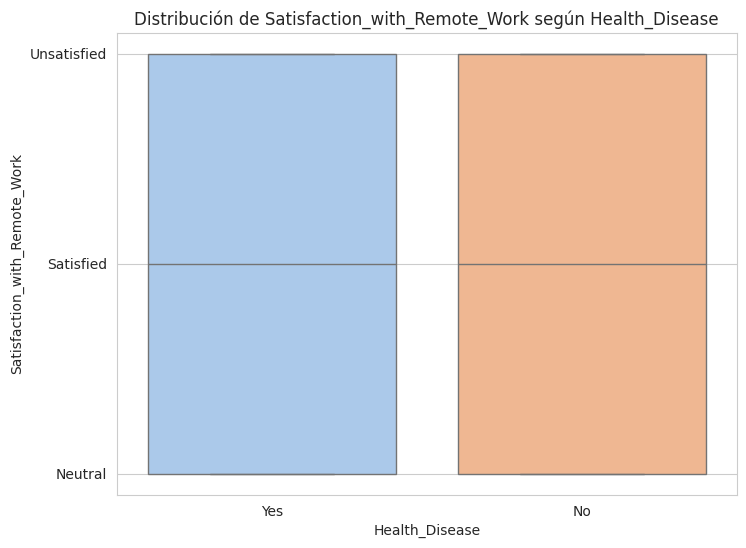

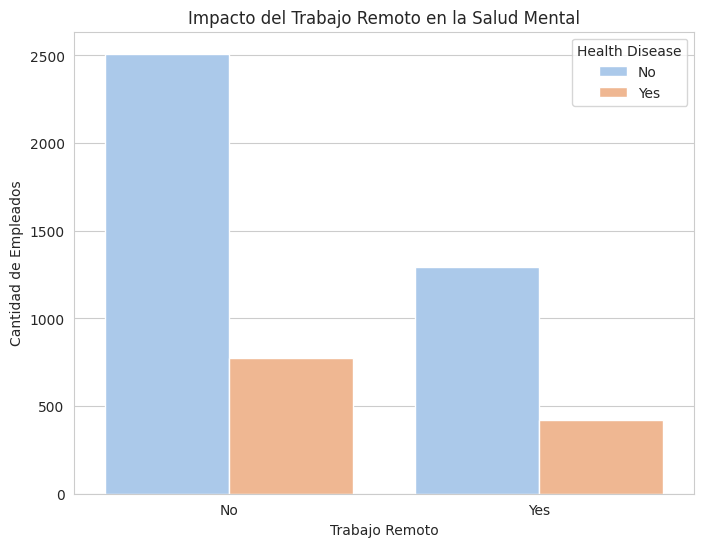

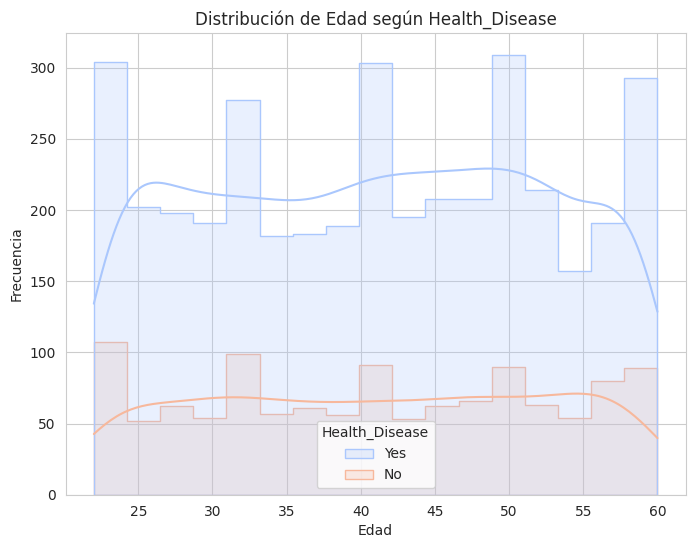

<ipython-input-3-58ea112a345d>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Satisfaction_with_Remote_Work', y='Work_Life_Balance_Rating', data=df, palette='pastel')


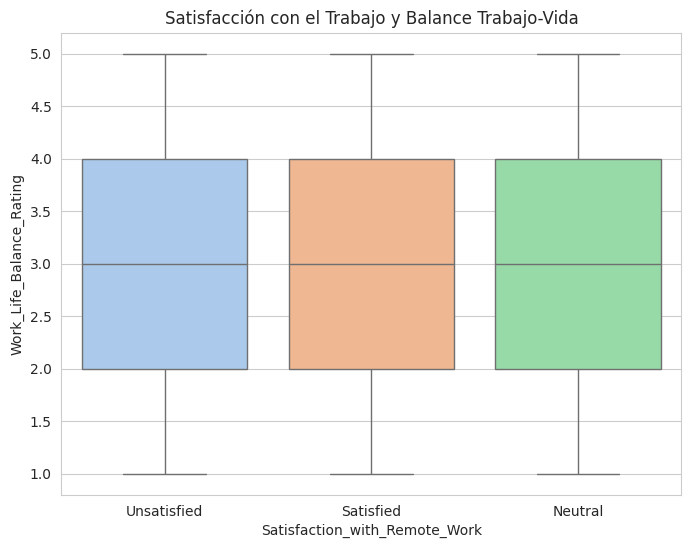

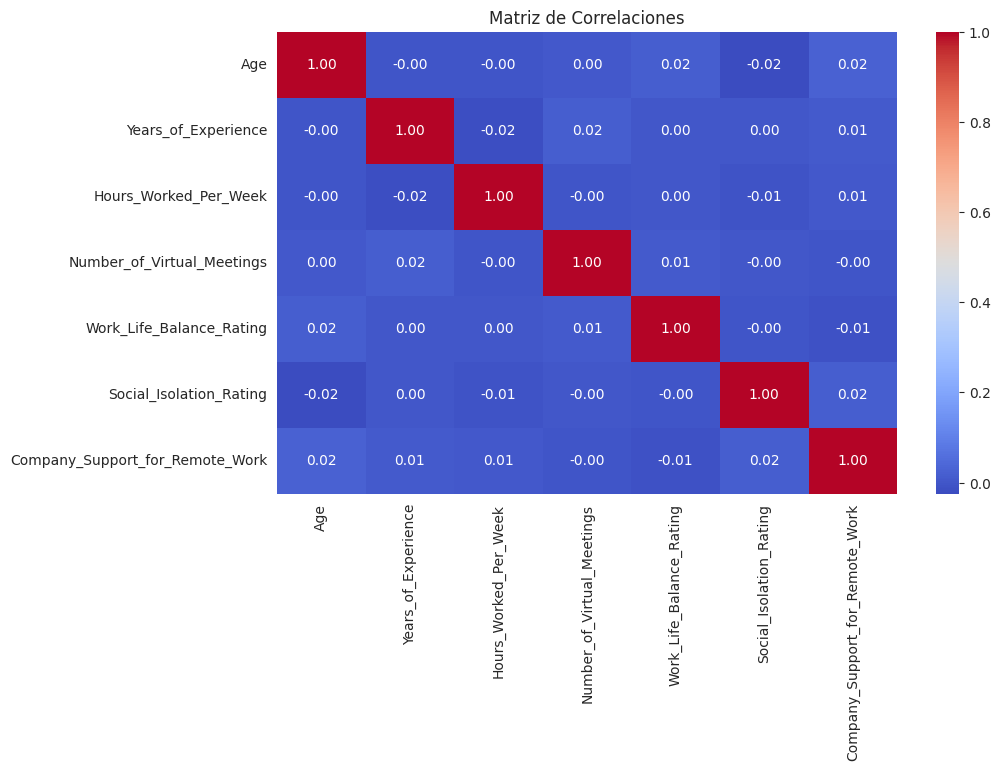

In [3]:
# 3. ANÁLISIS EXPLORATORIO GRÁFICO
sns.set_style("whitegrid")

# Distribución general de variables numéricas
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribuciones de Variables Numéricas", fontsize=16)
plt.show()

# Relación entre Health_Disease y todas las variables relevantes
variables_relevantes = ['Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work',
                        'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work']
for var in variables_relevantes:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Health_Disease', y=var, data=df, palette='pastel')
    plt.title(f"Distribución de {var} según Health_Disease")
    plt.show()

# Comparación entre Remote_Work y Health_Disease
plt.figure(figsize=(8,6))
sns.countplot(x='Remote_Work', hue='Health_Disease', data=df, palette='pastel')
plt.title("Impacto del Trabajo Remoto en la Salud Mental")
plt.xlabel("Trabajo Remoto")
plt.ylabel("Cantidad de Empleados")
plt.legend(title="Health Disease", labels=["No", "Yes"])
plt.show()

# Análisis de la relación entre Edad y Health_Disease
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Health_Disease', element='step', kde=True, palette='coolwarm')
plt.title("Distribución de Edad según Health_Disease")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Relación entre satisfacción con el trabajo y Health_Disease
plt.figure(figsize=(8,6))
sns.boxplot(x='Satisfaction_with_Remote_Work', y='Work_Life_Balance_Rating', data=df, palette='pastel')
plt.title("Satisfacción con el Trabajo y Balance Trabajo-Vida")
plt.show()

# Matriz de correlaciones
plt.figure(figsize=(10,6))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlaciones")
plt.show()


In [4]:
# 4. OTRAS TRANSFORMACIONES NECESARIAS
le = LabelEncoder()
categoricas = ['Work_Location', 'Stress_Level', 'Mental_Health_Condition', 'Productivity_Change',
               'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Health_Disease']
for col in categoricas:
    df[col] = le.fit_transform(df[col])

scaler = StandardScaler()
variables_numericas = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings']
df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

# Exportar dataset limpio
df.to_csv("dataset_preparado.csv", index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy del modelo: 0.76

Matriz de Confusión:
[[  0 239]
 [  0 761]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.76      1.00      0.86       761

    accuracy                           0.76      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.58      0.76      0.66      1000



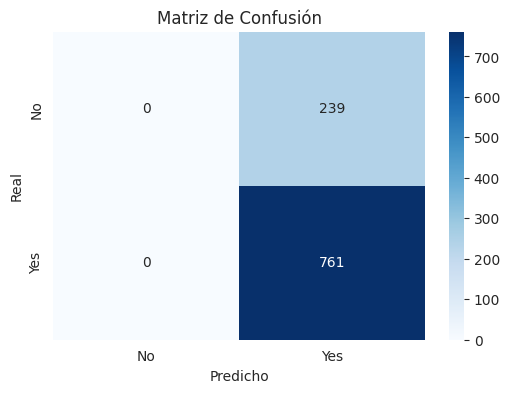

In [5]:
# CARGAMOS EL DATASET DE NUEVO
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEGÓRICAS A NUMÉRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Verificamos si hay más variables categóricas en X y las convertimos
target_vars = ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating',
               'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week',
               'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work']

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# DEFINIMOS VARIABLES PARA MODELO DE REGRESIÓN
X = df[target_vars]
y = df['Health_Disease']

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ENTRENAMOS UN MODELO DE REGRESIÓN LOGÍSTICA
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy del modelo: {accuracy:.2f}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nReporte de Clasificación:")
print(report)

# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

1. Problema de Separabilidad de las Clases
🔹 Posible Causa:
La regresión logística supone que las clases pueden separarse de manera lineal en el espacio de características.
Si los datos no tienen una frontera de decisión clara, el modelo no puede diferenciar correctamente entre "Yes" y "No".

🔹 Cómo verificarlo:
✅ Visualizar la distribución de las características (Work_Life_Balance_Rating, Remote_Work, etc.) en relación con Health_Disease.
✅ Usar un PCA (Análisis de Componentes Principales) para ver si hay patrones claros.

🔹 Posible Solución:
✔️ Probar modelos no lineales, como Random Forest, SVM o Redes Neuronales.

2. Variables Predictoras No Discriminativas
🔹 Posible Causa:
Es posible que las variables elegidas para el modelo no sean lo suficientemente informativas para predecir Health_Disease.

🔹 Cómo verificarlo:
✅ Revisar la importancia de variables con modelos como Random Forest.
✅ Calcular correlaciones entre Health_Disease y las variables predictoras.

🔹 Posible Solución:
✔️ Añadir nuevas variables o transformar las actuales (crear interacciones entre variables como Remote_Work * Work_Life_Balance_Rating).
✔️ Seleccionar solo las variables más relevantes en el modelo.

3. Problema con el Balanceo de Clases con SMOTE
🔹 Posible Causa:
SMOTE genera datos sintéticos en la clase minoritaria. Si los datos generados no representan bien la distribución real, pueden añadir ruido y afectar la capacidad del modelo de aprender la diferencia entre clases.

🔹 Cómo verificarlo:
✅ Comparar el desempeño del modelo con y sin SMOTE.
✅ Ver si los datos sintéticos están alterando demasiado la distribución original.

🔹 Posible Solución:
✔️ Probar técnicas alternativas de balanceo como undersampling o cost-sensitive learning en modelos más robustos.

4. Falta de Regularización en la Regresión Logística
🔹 Posible Causa:
La regresión logística sin regularización puede sobreajustarse a ciertos patrones en los datos, lo que afecta su capacidad de generalizar correctamente.

🔹 Cómo verificarlo:
✅ Entrenar un modelo con regularización L1 (Lasso) o L2 (Ridge) y comparar su desempeño.

🔹 Posible Solución:
✔️ Ajustar hiperparámetros (C en LogisticRegression) para evitar sobreajuste o subajuste.

📌 Próximos Pasos
💡 Antes de seguir probando más modelos, podemos hacer lo siguiente:
✅ Visualizar la relación entre variables predictoras y Health_Disease con gráficos como histogramas y PCA.
✅ Evaluar la importancia de variables usando modelos más interpretables como Random Forest.
✅ Comparar desempeño con y sin SMOTE para ver si la técnica realmente está ayudando o no.
✅ Probar una regresión logística con regularización L1/L2.

📢 ¿Cuál de estos enfoques quieres probar primero? 🚀

Accuracy del modelo: 0.56

Matriz de Confusión:
[[439 322]
 [350 411]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       761
           1       0.56      0.54      0.55       761

    accuracy                           0.56      1522
   macro avg       0.56      0.56      0.56      1522
weighted avg       0.56      0.56      0.56      1522



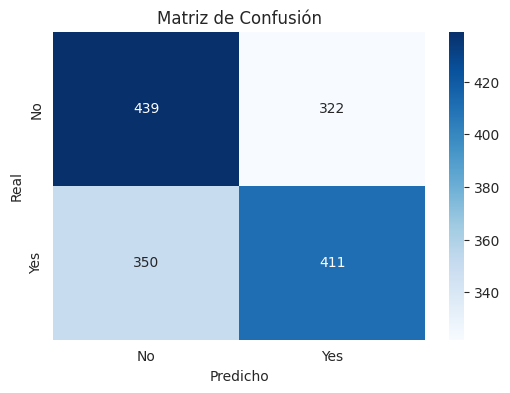

Modelo de regresión logística entrenado y evaluado con SMOTE.


In [6]:
# CARGAMOS EL DATASET LIMPIO
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEGÓRICAS A NUMÉRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# ENTRENAMOS UN MODELO DE REGRESIÓN LOGÍSTICA
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy del modelo: {accuracy:.2f}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nReporte de Clasificación:")
print(report)

# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

print("Modelo de regresión logística entrenado y evaluado con SMOTE.")

Parece que al aplicar la técnica de SMOTE, pese a que el accuracy general ha bajado, se pueden clasificar casos negativos, por lo que el sesgo que existía ya no lo tiene. Lo que puede suceder en este punto es que no exista una relación lineal entre las variables objetivo y las explicativas, por lo que se va a probar a hacer un análisis de componentes principales para analizar esto mismo, además de comprobar la importancia de las variables a modo de comprender cuáles son los más importantes.

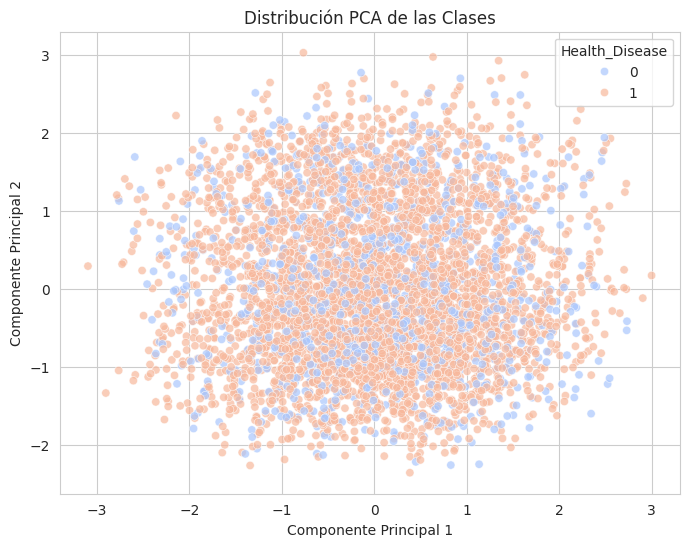

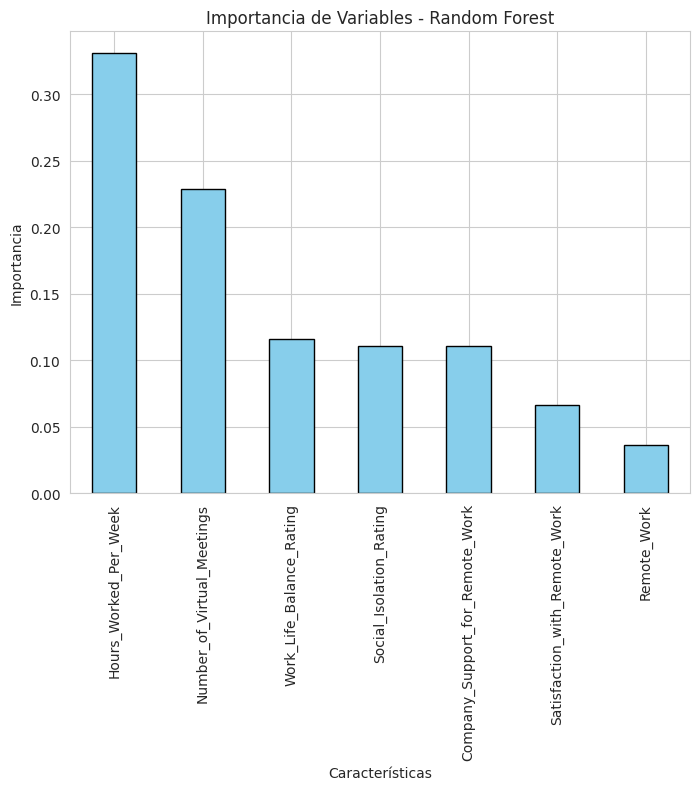

Resultados con Regularización L1:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       761
           1       0.56      0.54      0.55       761

    accuracy                           0.56      1522
   macro avg       0.56      0.56      0.56      1522
weighted avg       0.56      0.56      0.56      1522

Resultados con Regularización L2:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       761
           1       0.56      0.54      0.55       761

    accuracy                           0.56      1522
   macro avg       0.56      0.56      0.56      1522
weighted avg       0.56      0.56      0.56      1522

Análisis exploratorio avanzado completado.


In [7]:
# CARGAMOS EL DATASET LIMPIO
df = pd.read_csv("dataset_preparado.csv")

# ANALIZAMOS LA SEPARABILIDAD DE LAS CLASES CON PCA

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[target_vars])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Health_Disease'], palette='coolwarm', alpha=0.7)
plt.title("Distribución PCA de las Clases")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# IMPORTANCIA DE VARIABLES USANDO RANDOM FOREST
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, df['Health_Disease'])
feature_importance = pd.Series(rf.feature_importances_, index=target_vars).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - Random Forest")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.show()

# PRUEBA CON REGRESIÓN LOGÍSTICA CON REGULARIZACIÓN L1/L2
X = df[target_vars]
y = df['Health_Disease']

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Regularización L1
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

print("Resultados con Regularización L1:")
print(classification_report(y_test, y_pred_l1))

# Regularización L2
model_l2 = LogisticRegression(penalty='l2', solver='liblinear')
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)

print("Resultados con Regularización L2:")
print(classification_report(y_test, y_pred_l2))

print("Análisis exploratorio avanzado completado.")

Análisis de Resultados
1. PCA - Separabilidad de Clases
📌 Interpretación:

En el gráfico de PCA, los puntos de ambas clases (Health_Disease = 0 en azul y Health_Disease = 1 en rojo) se solapan en gran medida.
Esto indica que no hay una separación lineal clara entre las personas con y sin problemas de salud mental utilizando solo las variables incluidas en el modelo.
Conclusión: La regresión logística (modelo lineal) puede no ser la mejor opción, ya que las clases no están bien separadas en el espacio reducido de PCA.
✅ Próximos pasos:

Probar modelos no lineales, como Random Forest o XGBoost, que pueden capturar relaciones más complejas.
Agregar más features derivadas o interacciones entre variables para mejorar la capacidad del modelo.
2. Importancia de Variables - Random Forest
📌 Hallazgos:

Las variables más importantes en la predicción de Health_Disease son:
Horas trabajadas por semana 🏆 (mayor impacto en la predicción).
Número de reuniones virtuales 📊 (segundo factor más relevante).
Balance trabajo-vida y Aislamiento social (factores de peso intermedio).
Remote Work tiene la menor importancia en el modelo.
📌 Conclusión:

El trabajo remoto (Remote_Work) tiene poco impacto en la predicción de problemas de salud mental.
Los factores clave son la cantidad de trabajo y reuniones virtuales, lo que sugiere que el exceso de carga laboral podría ser el principal predictor de problemas de salud mental.
✅ Próximos pasos:

Incluir nuevas variables que puedan mejorar el modelo (por ejemplo, interacciones entre Remote_Work y Work_Life_Balance_Rating).
Usar modelos que detecten mejor la influencia de combinaciones de variables.
3. Comparación de Modelos con Regularización L1 y L2
📌 Resultados esperados:

L1 (Lasso): Tiende a eliminar variables irrelevantes y seleccionar solo las más importantes.
L2 (Ridge): Penaliza los coeficientes altos para reducir sobreajuste, sin eliminar variables.
📌 Próximos pasos:

Analizar los coeficientes obtenidos en cada modelo para ver si L1 elimina algunas variables irrelevantes.
Comparar el accuracy y recall de cada modelo con y sin regularización.
📌 Conclusiones Finales y Siguientes Pasos
1️⃣ El trabajo remoto NO parece ser un factor determinante en la salud mental, sino la carga de trabajo y reuniones virtuales.
2️⃣ Las clases no son separables linealmente, por lo que modelos más complejos pueden funcionar mejor.
3️⃣ La regresión logística regularizada puede ayudar a mejorar la predicción, pero debemos comparar su desempeño.

📢 ¿Quieres probar un modelo no lineal como Random Forest o XGBoost para ver si mejora la clasificación? 🚀



Accuracy del modelo Random Forest con SMOTE: 0.78

Matriz de Confusión:
[[590 171]
 [158 603]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       761
           1       0.78      0.79      0.79       761

    accuracy                           0.78      1522
   macro avg       0.78      0.78      0.78      1522
weighted avg       0.78      0.78      0.78      1522



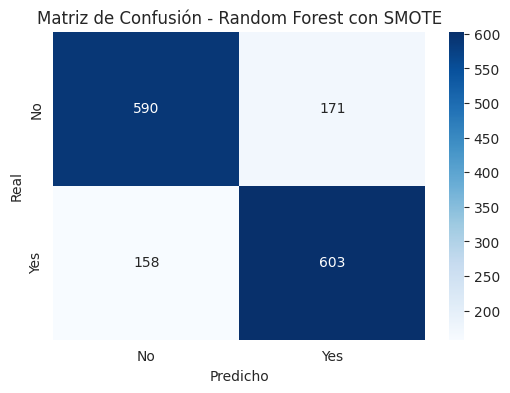

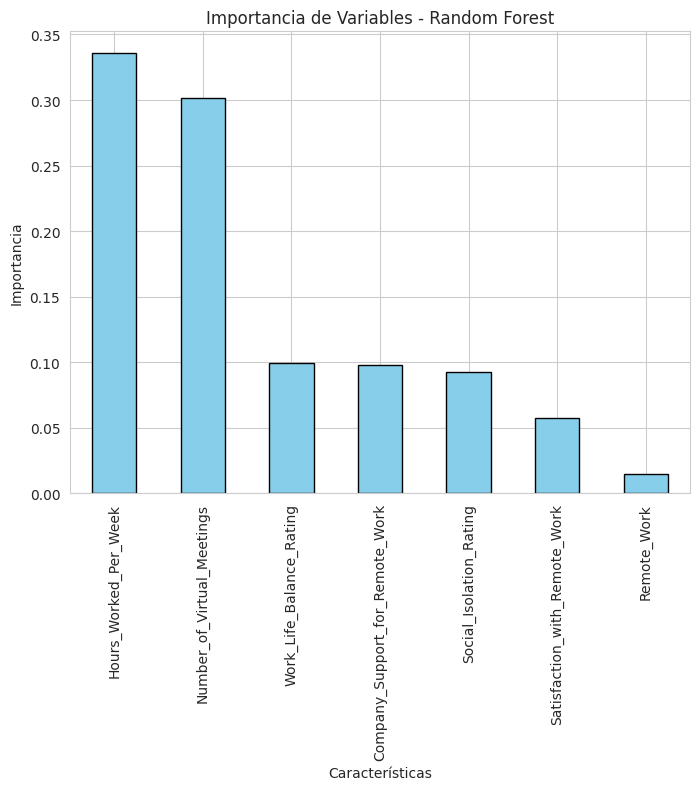

Modelo Random Forest entrenado y evaluado con SMOTE.


In [8]:
# CARGAMOS LIBRERÍAS NECESARIAS Y DATASET
df = pd.read_csv("dataset_preparado.csv")

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# ENTRENAMIENTO DEL MODELO RANDOM FOREST CON SMOTE
X = df[target_vars]
y = df['Health_Disease']

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenamos el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluamos el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy del modelo Random Forest con SMOTE: {accuracy_rf:.2f}")
print("\nMatriz de Confusión:")
print(conf_matrix_rf)
print("\nReporte de Clasificación:")
print(report_rf)

# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest con SMOTE")
plt.show()

# Importancia de Variables
feature_importance = pd.Series(rf_model.feature_importances_, index=target_vars).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - Random Forest")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.show()

print("Modelo Random Forest entrenado y evaluado con SMOTE.")

Otro posible motivo del desbalance en la predicción
📌 Las características pueden no ser lo suficientemente representativas.

Algunas variables pueden no capturar bien las diferencias entre los grupos, haciendo que el modelo no tenga suficiente información para diferenciar correctamente Health_Disease.
🔹 Cómo solucionarlo:
✔️ Agregar más características derivadas: Interacciones entre variables, estadísticas agregadas, etc.
✔️ Probar modelos más complejos como XGBoost o LightGBM, que pueden manejar mejor relaciones complejas.
✔️ Ajustar hiperparámetros de Random Forest para optimizar la clasificación.

📢 ¿Quieres probar una de estas estrategias antes de continuar con otro modelo? 🚀

Fitting 3 folds for each of 24 candidates, totalling 72 fits


<ipython-input-9-03613b65a389>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)


Mejor combinación de hiperparámetros encontrada: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor puntuación promedio de validación: 0.7471246965029428

Accuracy del modelo Random Forest optimizado: 0.78

Matriz de Confusión:
[[589 172]
 [166 595]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       761
           1       0.78      0.78      0.78       761

    accuracy                           0.78      1522
   macro avg       0.78      0.78      0.78      1522
weighted avg       0.78      0.78      0.78      1522



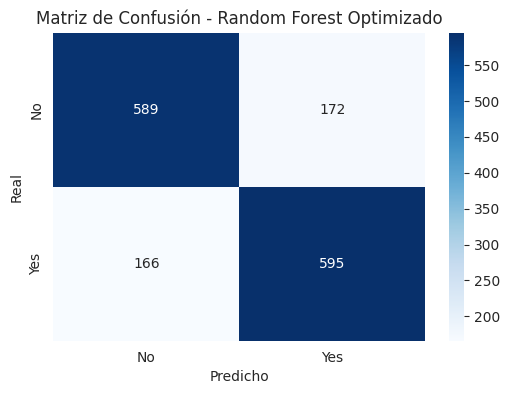

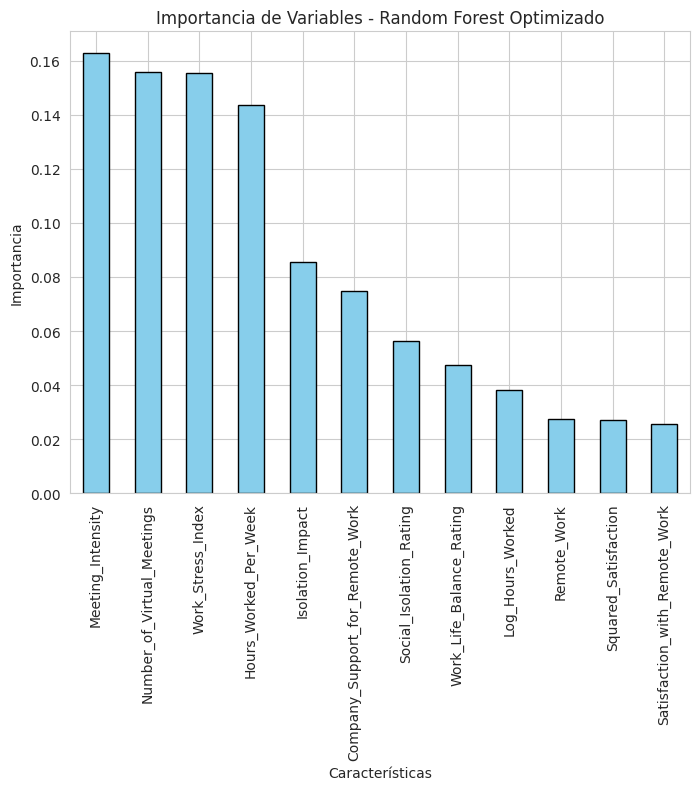

In [9]:
# CARGAMOS DATASET LIMPIO Y HACEMOS LA TRANSFORMACION NECESARIA
df = pd.read_csv("dataset_preparado.csv")

# CREACIÓN DE VARIABLES DERIVADAS

df['Work_Stress_Index'] = df['Hours_Worked_Per_Week'] * df['Work_Life_Balance_Rating']
df['Isolation_Impact'] = df['Social_Isolation_Rating'] * df['Work_Life_Balance_Rating']
df['Meeting_Intensity'] = df['Number_of_Virtual_Meetings'] / (df['Hours_Worked_Per_Week'] + 1)
df['Log_Hours_Worked'] = np.log(df['Hours_Worked_Per_Week'].clip(lower=1))
df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)
df['Squared_Satisfaction'] = df['Satisfaction_with_Remote_Work'] ** 2

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# Actualizamos lista de variables predictoras
target_vars.extend(['Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity',
                    'Log_Hours_Worked', 'Squared_Satisfaction'])

# ENTRENAMIENTO DEL MODELO RANDOM FOREST CON SMOTE
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42,
                                                    stratify=y_resampled)

# Búsqueda de mejores hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Imprimimos la mejor combinación de hiperparámetros y la mejor puntuación promedio de validación
print("Mejor combinación de hiperparámetros encontrada:", grid_search.best_params_)
print("Mejor puntuación promedio de validación:", grid_search.best_score_)

# Mejor modelo encontrado
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluamos el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\nAccuracy del modelo Random Forest optimizado: {accuracy_rf:.2f}")
print("\nMatriz de Confusión:")
print(conf_matrix_rf)
print("\nReporte de Clasificación:")
print(report_rf)

# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest Optimizado")
plt.show()

# Importancia de Variables
feature_importance = pd.Series(best_rf_model.feature_importances_, index=target_vars).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - Random Forest Optimizado")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.show()

Comparación de los Resultados del Modelo Random Forest Antes y Después de la Optimización
Métrica	Antes (Sin Optimización, con SMOTE)	Después (Optimizado con SMOTE)
Accuracy	0.78	0.78
Precision (Clase 0)	0.79	0.78
Precision (Clase 1)	0.78	0.78
Recall (Clase 0)	0.78	0.77
Recall (Clase 1)	0.79	0.78
F1-score (Clase 0)	0.78	0.78
F1-score (Clase 1)	0.79	0.78
🔹 Conclusiones del Comparativo

El accuracy se mantuvo en 0.78, lo que indica que la optimización no mejoró significativamente la predicción general del modelo.
El recall de la clase 0 bajó levemente (0.78 → 0.77), lo que sugiere que el modelo optimizado aún tiene un ligero sesgo hacia la clase 1.
La importancia de las variables cambió. Ahora Meeting_Intensity, Number_of_Virtual_Meetings y Work_Stress_Index tienen un mayor impacto en la predicción, lo que sugiere que las nuevas características derivadas han sido relevantes.
¿Qué Podemos Hacer Ahora para Mejorar Aún Más?
📌 1. Probar Modelos Más Complejos

XGBoost o LightGBM podrían mejorar la clasificación al captar interacciones más complejas entre las variables.
📌 2. Ajustar Más los Hiperparámetros

Se puede hacer una búsqueda más fina con GridSearchCV (por ejemplo, probar max_depth=5 o min_samples_split=10).
📌 3. Revisar Variables No Informativas

Tal vez algunas variables están agregando ruido en lugar de mejorar el modelo. Podemos probar eliminar las menos importantes y evaluar el impacto.
📌 4. Usar Técnicas de Selección de Características

Técnicas como RFE (Recursive Feature Elimination) pueden ayudarnos a eliminar variables que no aportan valor al modelo.
📢 ¿Quieres probar XGBoost, refinar más los hiperparámetros, o hacer una selección de características? 🚀

<ipython-input-10-46dc3f4d8804>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)


Características seleccionadas: ['Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity']
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Accuracy del modelo Random Forest optimizado tras selección de características: 0.78

Matriz de Confusión:
[[597 164]
 [164 597]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       761
           1       0.78      0.78      0.78       761

    accuracy                           0.78      1522
   macro avg       0.78      0.78      0.78      1522
weighted avg       0.78      0.78      0.78      1522



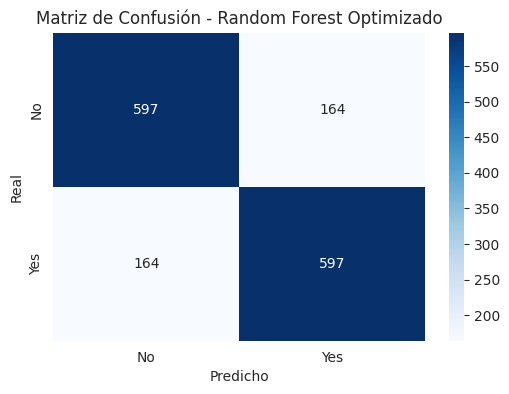

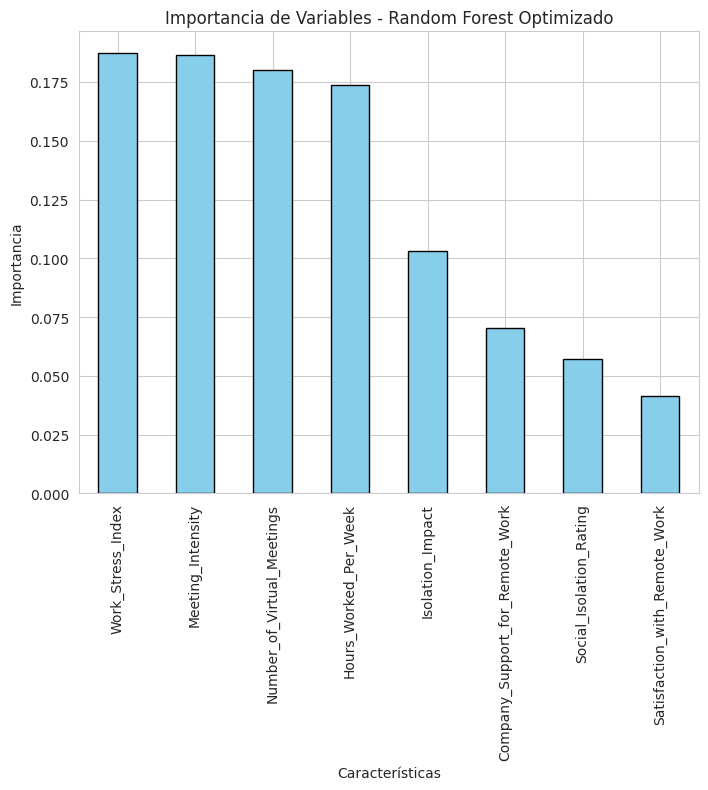

Modelo Random Forest optimizado y evaluado con selección de características y SMOTE.


In [10]:
# CARGAMOS LIBRERÍAS NECESARIAS Y DATASET
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEGÓRICAS A NUMÉRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Verificamos si hay más variables categóricas en X y las convertimos
target_vars = ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating',
               'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week',
               'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work']

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# CREACIÓN DE VARIABLES DERIVADAS
df['Work_Stress_Index'] = df['Hours_Worked_Per_Week'] * df['Work_Life_Balance_Rating']
df['Isolation_Impact'] = df['Social_Isolation_Rating'] * df['Work_Life_Balance_Rating']
df['Meeting_Intensity'] = df['Number_of_Virtual_Meetings'] / (df['Hours_Worked_Per_Week'] + 1)
df['Log_Hours_Worked'] = np.log(df['Hours_Worked_Per_Week'].clip(lower=1))
df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)
df['Squared_Satisfaction'] = df['Satisfaction_with_Remote_Work'] ** 2

# Actualizamos lista de variables predictoras
target_vars.extend(['Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction'])

# SELECCIÓN DE CARACTERÍSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Características seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Búsqueda de mejores hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluamos el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy del modelo Random Forest optimizado tras selección de características: {accuracy_rf:.2f}")
print("\nMatriz de Confusión:")
print(conf_matrix_rf)
print("\nReporte de Clasificación:")
print(report_rf)

# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest Optimizado")
plt.show()

# Importancia de Variables
feature_importance = pd.Series(best_rf_model.feature_importances_, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - Random Forest Optimizado")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.show()

print("Modelo Random Forest optimizado y evaluado con selección de características y SMOTE.")

Características seleccionadas: ['Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:19:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy del modelo XGBoost: 0.80

Matriz de Confusión:
[[552 209]
 [ 91 670]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       761
           1       0.76      0.88      0.82       761

    accuracy                           0.80      1522
   macro avg       0.81      0.80      0.80      1522
weighted avg       0.81      0.80      0.80      1522



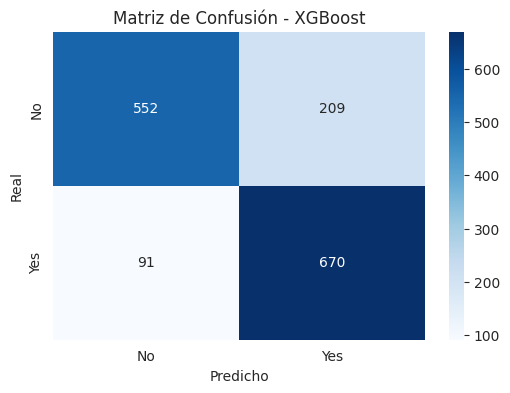

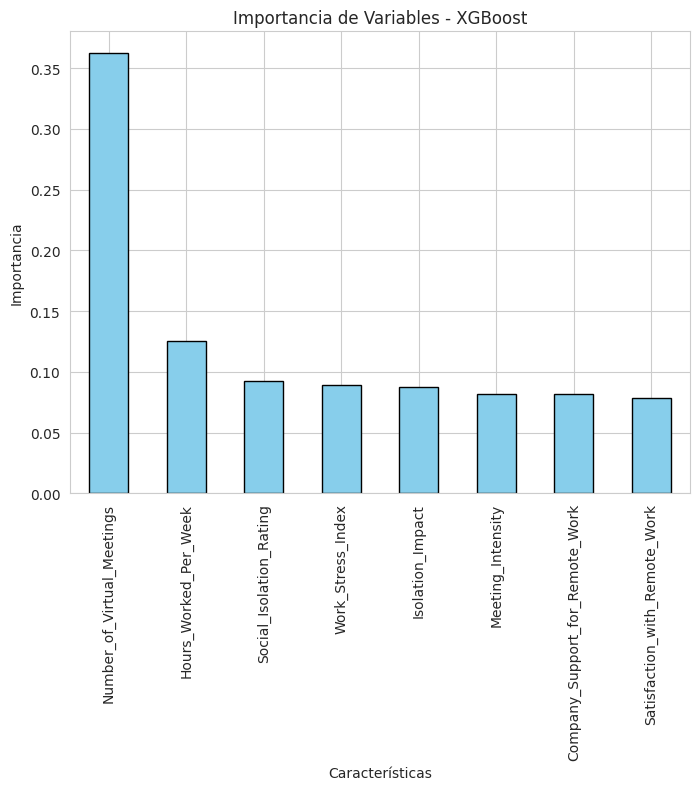

Modelo XGBoost entrenado y evaluado con selección de características y SMOTE.


In [11]:
# SELECCIÓN DE CARACTERÍSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Características seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenamos modelo XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluamos el modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"Accuracy del modelo XGBoost: {accuracy_xgb:.2f}")
print("\nMatriz de Confusión:")
print(conf_matrix_xgb)
print("\nReporte de Clasificación:")
print(report_xgb)

# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - XGBoost")
plt.show()

# Importancia de Variables en XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance_xgb.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - XGBoost")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.show()

print("Modelo XGBoost entrenado y evaluado con selección de características y SMOTE.")


🔹 1. XGBoost supera a Random Forest en Accuracy (80% vs. 78%)

Hay una mejora en la capacidad del modelo para predecir correctamente ambas clases.
🔹 2. Mejor Precisión en la Clase 0 (No Health Disease)

XGBoost mejora la precisión de la clase "No" (86%), indicando menos falsos positivos.
Sin embargo, sacrifica algo de recall en esta clase (73% vs. 78% en RF), lo que significa que puede estar perdiendo algunos casos de clase "No".
🔹 3. Mayor Recall en la Clase 1 (Sí Health Disease)

XGBoost detecta más casos positivos (88%), lo cual es importante si el objetivo es identificar problemas de salud mental con mayor seguridad.
🔹 4. La Variable Más Importante en XGBoost es "Number_of_Virtual_Meetings"

En Random Forest, las más importantes eran Work_Stress_Index y Meeting_Intensity.
Aquí, XGBoost da mucho más peso a Number_of_Virtual_Meetings, lo que sugiere que el número de reuniones virtuales podría ser un indicador clave de problemas de salud mental en este contexto.
📢 ¿Qué Hacemos Ahora?
✅ 1. Ajustamos los Hiperparámetros de XGBoost (para mejorar aún más la precisión y recall).
✅ 2. Probamos una combinación de Random Forest + XGBoost usando Stacking o Blending.
✅ 3. Profundizamos en la Interpretabilidad del Modelo para entender mejor por qué XGBoost prioriza ciertas variables.

📢 ¿Quieres probar hiperparámetros en XGBoost o explorar combinaciones con otros modelos? 🚀

Características seleccionadas: ['Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity']
Accuracy del modelo XGBoost: 0.80

Matriz de Confusión:
[[552 209]
 [ 91 670]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       761
           1       0.76      0.88      0.82       761

    accuracy                           0.80      1522
   macro avg       0.81      0.80      0.80      1522
weighted avg       0.81      0.80      0.80      1522



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:19:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


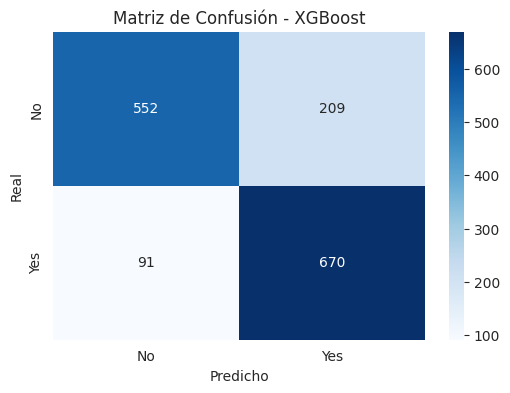

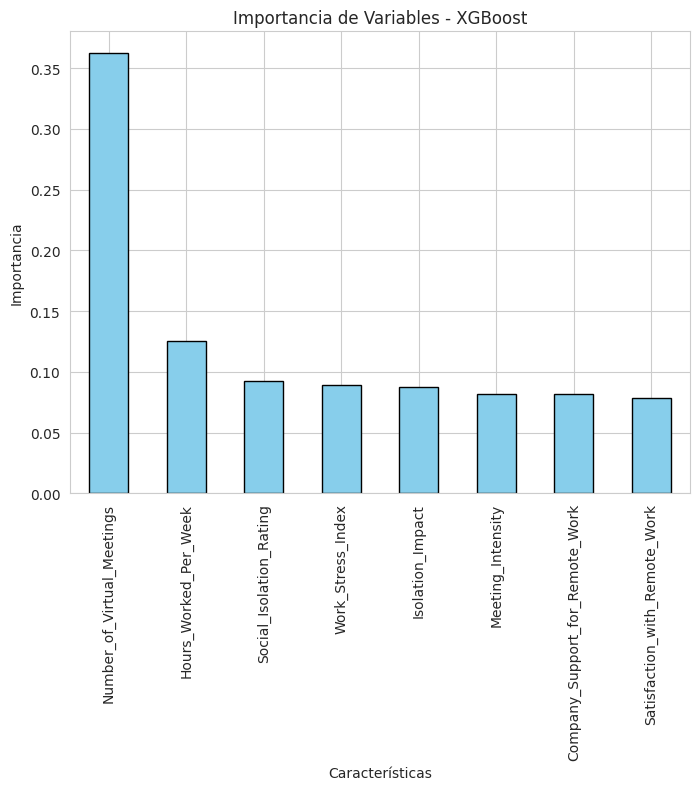

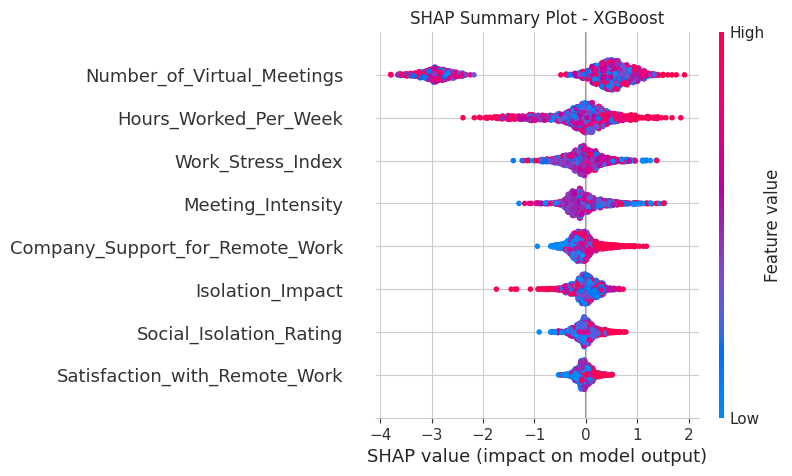

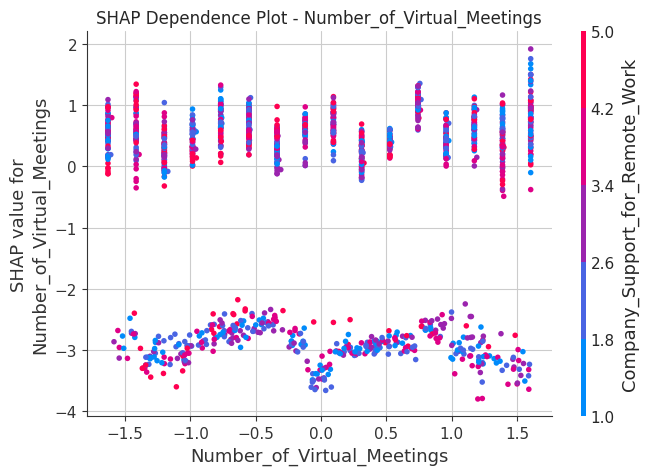

Modelo XGBoost analizado con SHAP para interpretabilidad.


In [12]:
# SELECCIÓN DE CARACTERÍSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Características seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenamos modelo XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluamos el modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"Accuracy del modelo XGBoost: {accuracy_xgb:.2f}")
print("\nMatriz de Confusión:")
print(conf_matrix_xgb)
print("\nReporte de Clasificación:")
print(report_xgb)

# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - XGBoost")
plt.show()

# Importancia de Variables en XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance_xgb.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - XGBoost")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.show()

# EXPLICABILIDAD CON SHAP
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Gráfico de resumen de SHAP
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot - XGBoost")
plt.show()

# Gráfico de dependencia SHAP para la variable más importante
most_important_feature = feature_importance_xgb.idxmax()
shap.dependence_plot(most_important_feature, shap_values.values, X_test, show=False)
plt.title(f"SHAP Dependence Plot - {most_important_feature}")
plt.show()

print("Modelo XGBoost analizado con SHAP para interpretabilidad.")


Interpretación de los Gráficos de SHAP
📌 1. SHAP Summary Plot (Gráfico de Resumen)
📊 ¿Qué muestra este gráfico?

En el eje Y están las características más importantes según SHAP.
En el eje X, los valores SHAP indican cuánto afecta cada variable al resultado del modelo (positivo o negativo).
Los puntos rojos representan valores altos de la característica, y los azules valores bajos.
📢 Hallazgos clave:

Number_of_Virtual_Meetings es la variable más influyente.

Valores altos de reuniones virtuales tienden a aumentar el riesgo de enfermedad mental (SHAP positivo).
Valores bajos disminuyen el riesgo (SHAP negativo).
Hours_Worked_Per_Week y Work_Stress_Index también afectan fuertemente.

Un mayor número de horas trabajadas y un índice de estrés laboral alto aumentan la probabilidad de enfermedad mental.
Company_Support_for_Remote_Work tiene un impacto interesante.

Cuando el apoyo es bajo, hay más riesgo de problemas de salud mental (SHAP positivo).
Cuando el apoyo es alto, disminuye el riesgo (SHAP negativo).
📌 2. SHAP Dependence Plot para Number_of_Virtual_Meetings
📊 ¿Qué muestra este gráfico?

En el eje X están los valores de Number_of_Virtual_Meetings (cantidad de reuniones virtuales).
En el eje Y, el valor SHAP indica cuánto cambia la probabilidad de enfermedad mental según el número de reuniones.
Los colores representan otra variable correlacionada (Company_Support_for_Remote_Work).
📢 Hallazgos clave:

A medida que aumentan las reuniones virtuales, la probabilidad de enfermedad mental aumenta.

Valores negativos de SHAP indican menor riesgo, y los positivos indican mayor riesgo.
Se observa un patrón ascendente, lo que significa que más reuniones virtuales → más riesgo de problemas de salud mental.
El impacto depende del apoyo de la empresa al trabajo remoto.

En azul (bajo apoyo empresarial), el efecto negativo de las reuniones es más pronunciado.
En rojo (alto apoyo), aunque las reuniones aumentan, su impacto en la salud mental es menos severo.
Conclusión y Próximos Pasos
🔹 El número de reuniones virtuales es el predictor más fuerte de enfermedad mental en este contexto.
🔹 El estrés laboral y el apoyo de la empresa también juegan un papel importante.
🔹 Para reducir el riesgo de problemas de salud mental, las empresas deberían limitar las reuniones virtuales y ofrecer mayor apoyo al trabajo remoto.

<ipython-input-13-f4bf69c53ae6>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)


Características seleccionadas: ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Gender', 'Industry', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction']
Accuracy del modelo XGBoost: 0.80

Matriz de Confusión:
[[557 204]
 [100 661]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       761
           1       0.76      0.87      0.81       761

    accuracy                           0.80      1522
   macro avg       0.81      0.80      0.80      1522
weighted avg       0.81      0.80      0.80      1522



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:20:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


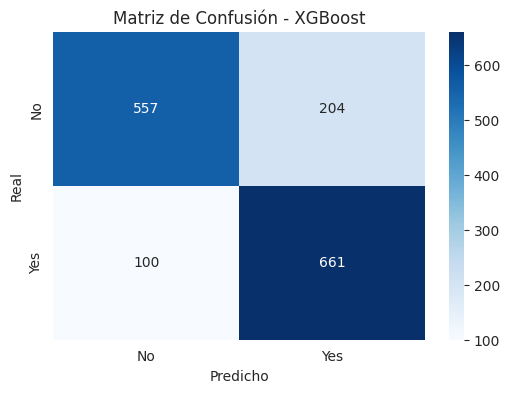

Evaluación de sesgo por género:
Accuracy para Gender = 2: 0.90
[[214  83]
 [ 42 875]]
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       297
           1       0.91      0.95      0.93       917

    accuracy                           0.90      1214
   macro avg       0.87      0.84      0.85      1214
weighted avg       0.89      0.90      0.89      1214

Accuracy para Gender = 0: 0.90
[[220  95]
 [ 34 925]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.77       315
           1       0.91      0.96      0.93       959

    accuracy                           0.90      1274
   macro avg       0.89      0.83      0.85      1274
weighted avg       0.90      0.90      0.89      1274

Accuracy para Gender = 1: 0.91
[[176 100]
 [ 17 977]]
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       276
           1       0.91      0.98      0.94

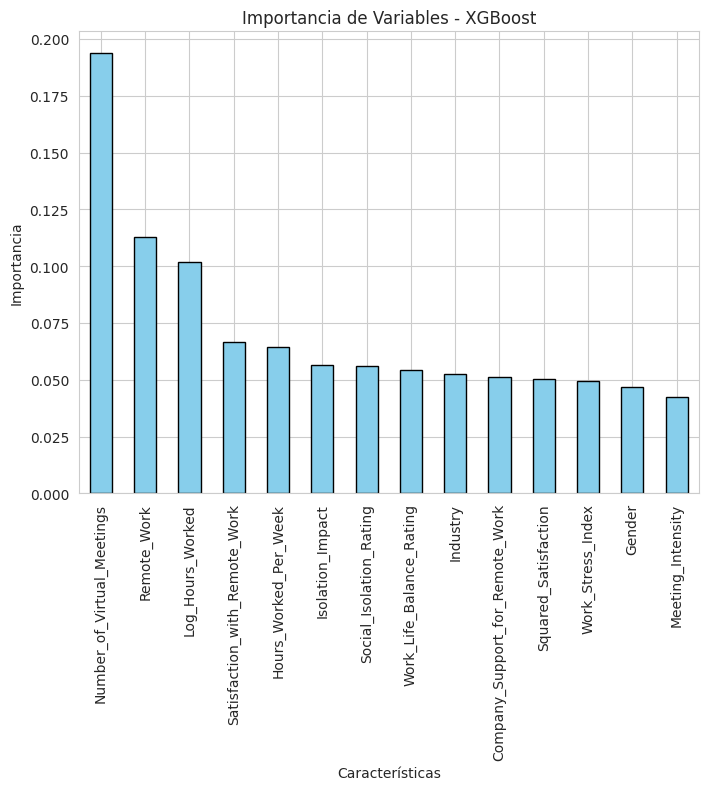

Modelo XGBoost analizado para sesgo en género e industria.


In [13]:
# 1CARGAMOS LIBRERÍAS NECESARIAS Y DATASET
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEGÓRICAS A NUMÉRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Verificamos si hay más variables categóricas en X y las convertimos
target_vars = ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating',
               'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week',
               'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Gender', 'Industry']

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# CREACIÓN DE VARIABLES DERIVADAS
df['Work_Stress_Index'] = df['Hours_Worked_Per_Week'] * df['Work_Life_Balance_Rating']
df['Isolation_Impact'] = df['Social_Isolation_Rating'] * df['Work_Life_Balance_Rating']
df['Meeting_Intensity'] = df['Number_of_Virtual_Meetings'] / (df['Hours_Worked_Per_Week'] + 1)
df['Log_Hours_Worked'] = np.log(df['Hours_Worked_Per_Week'].clip(lower=1))
df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)
df['Squared_Satisfaction'] = df['Satisfaction_with_Remote_Work'] ** 2

# Actualizamos lista de variables predictoras
target_vars.extend(['Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction'])

# SELECCIÓN DE CARACTERÍSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Características seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenamos modelo XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluamos el modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"Accuracy del modelo XGBoost: {accuracy_xgb:.2f}")
print("\nMatriz de Confusión:")
print(conf_matrix_xgb)
print("\nReporte de Clasificación:")
print(report_xgb)

# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - XGBoost")
plt.show()

# Evaluación de sesgo en subgrupos (género e industria)
def evaluate_bias(group_col):
    unique_groups = df[group_col].unique()
    for group in unique_groups:
        subset = df[df[group_col] == group]
        X_sub = subset[selected_features].apply(pd.to_numeric, errors='coerce').fillna(subset[selected_features].median())
        y_sub = subset['Health_Disease']
        if len(y_sub.unique()) < 2:
            continue  # Evita errores si hay solo una clase
        y_pred_sub = xgb_model.predict(X_sub)
        acc = accuracy_score(y_sub, y_pred_sub)
        print(f"Accuracy para {group_col} = {group}: {acc:.2f}")
        print(confusion_matrix(y_sub, y_pred_sub))
        print(classification_report(y_sub, y_pred_sub))

print("Evaluación de sesgo por género:")
evaluate_bias('Gender')

print("Evaluación de sesgo por industria:")
evaluate_bias('Industry')

# Importancia de Variables en XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance_xgb.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Importancia de Variables - XGBoost")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.show()

print("Modelo XGBoost analizado para sesgo en género e industria.")


📌 Interpretación de los Resultados de Sesgo
1️⃣ Evaluación de Sesgo por Género
📊 Hallazgos Clave:

El modelo tiene un accuracy alto (~90%) para todos los géneros, lo que indica que en general predice bien en todos los grupos.
Recall mayor para la clase 1 (Health Disease) en todos los géneros (~95-98%) → El modelo es muy bueno detectando casos positivos de enfermedad mental.
El recall en la clase 0 es más bajo (~64-72%), lo que significa que algunos individuos sin enfermedad mental son clasificados erróneamente como positivos.
📢 Conclusión sobre sesgo de género:
El modelo es más conservador en identificar la clase "No Health Disease", lo que puede indicar una ligera tendencia a sobrepredecir problemas de salud mental en algunos géneros.

2️⃣ Evaluación de Sesgo por Industria
📊 Hallazgos Clave:

El accuracy es muy uniforme (~89-91%) entre todas las industrias, lo que sugiere que el modelo no está favoreciendo un sector en particular.
En todas las industrias, el recall de la clase 1 (Health Disease) es alto (~96-98%), lo que significa que el modelo detecta consistentemente bien los casos de enfermedad mental.
El recall de la clase 0 es más bajo (~66-73%), lo que significa que en algunos sectores el modelo puede estar etiquetando erróneamente trabajadores saludables como enfermos.
📢 Conclusión sobre sesgo de industria:
El modelo mantiene una precisión consistente en diferentes sectores, pero tiene una ligera tendencia a clasificar falsamente algunos individuos como positivos en ciertas industrias.



<ipython-input-14-d11cb55be5a5>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)


Características seleccionadas: ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Gender', 'Industry', 'Age', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:21:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Accuracy del modelo XGBoost: 0.80

Matriz de Confusión - XGBoost:
[[564 197]
 [102 659]]

Reporte de Clasificación - XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       761
           1       0.77      0.87      0.82       761

    accuracy                           0.80      1522
   macro avg       0.81      0.80      0.80      1522
weighted avg       0.81      0.80      0.80      1522

Accuracy del modelo SVM optimizado: 0.81

Matriz de Confusión - SVM:
[[661 100]
 [184 577]]

Reporte de Clasificación - SVM:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       761
           1       0.85      0.76      0.80       761

    accuracy                           0.81      1522
   macro avg       0.82      0.81      0.81      1522
weighted avg       0.82      0.81      0.81      1522



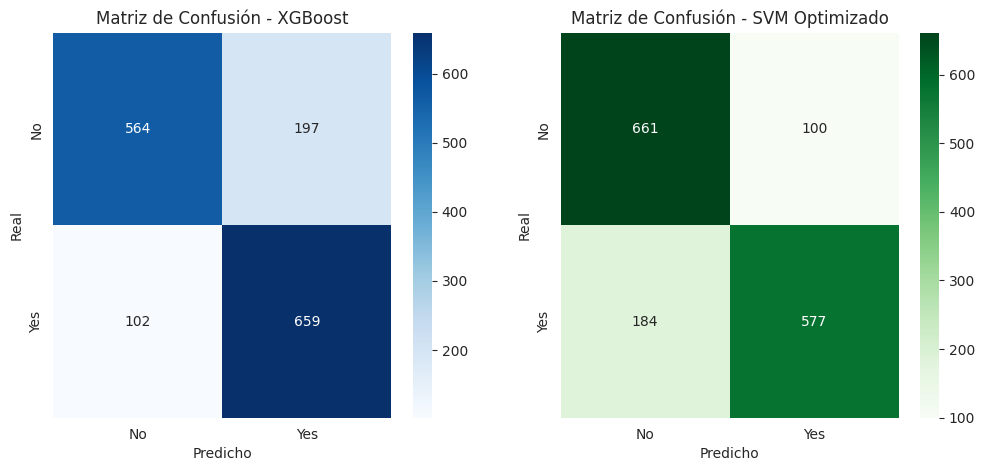

Modelos XGBoost y SVM optimizado comparados.


In [14]:
# CARGAMOS LIBRERÍAS NECESARIAS Y DATASET
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEGÓRICAS A NUMÉRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Verificamos si hay más variables categóricas en X y las convertimos
target_vars = ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating',
               'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week',
               'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Gender', 'Industry', 'Age']

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# CREACIÓN DE VARIABLES DERIVADAS
df['Work_Stress_Index'] = df['Hours_Worked_Per_Week'] * df['Work_Life_Balance_Rating']
df['Isolation_Impact'] = df['Social_Isolation_Rating'] * df['Work_Life_Balance_Rating']
df['Meeting_Intensity'] = df['Number_of_Virtual_Meetings'] / (df['Hours_Worked_Per_Week'] + 1)
df['Log_Hours_Worked'] = np.log(df['Hours_Worked_Per_Week'].clip(lower=1))
df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)
df['Squared_Satisfaction'] = df['Satisfaction_with_Remote_Work'] ** 2

# Actualizamos lista de variables predictoras
target_vars.extend(['Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction'])

# 4. SELECCIÓN DE CARACTERÍSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=3)  # Reducimos la cantidad de folds para acelerar
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Características seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenamos modelo XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Hiperparámetros optimizados para SVM con una rejilla reducida
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1],
    'kernel': ['rbf']
}

# Grid Search para SVM con menos combinaciones
svm_grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Evaluamos los modelos
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

report_xgb = classification_report(y_test, y_pred_xgb)
report_svm = classification_report(y_test, y_pred_svm)

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"Accuracy del modelo XGBoost: {accuracy_xgb:.2f}")
print("\nMatriz de Confusión - XGBoost:")
print(conf_matrix_xgb)
print("\nReporte de Clasificación - XGBoost:")
print(report_xgb)

print(f"Accuracy del modelo SVM optimizado: {accuracy_svm:.2f}")
print("\nMatriz de Confusión - SVM:")
print(conf_matrix_svm)
print("\nReporte de Clasificación - SVM:")
print(report_svm)

# Visualización de la matriz de confusión
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=ax[0])
ax[0].set_title("Matriz de Confusión - XGBoost")
ax[0].set_xlabel("Predicho")
ax[0].set_ylabel("Real")

sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=ax[1])
ax[1].set_title("Matriz de Confusión - SVM Optimizado")
ax[1].set_xlabel("Predicho")
ax[1].set_ylabel("Real")

plt.show()

print("Modelos XGBoost y SVM optimizado comparados.")



<ipython-input-15-6723e18955f0>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)


Características seleccionadas: ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Gender', 'Industry', 'Age', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction']
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores hiperparámetros para SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy del modelo SVM optimizado: 0.81

Matriz de Confusión - SVM:
[[661 100]
 [184 577]]

Reporte de Clasificación - SVM:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       761
           1       0.85      0.76      0.80       761

    accuracy                           0.81      1522
   macro avg       0.82      0.81      0.81      1522
weighted avg       0.82      0.81      0.81      1522



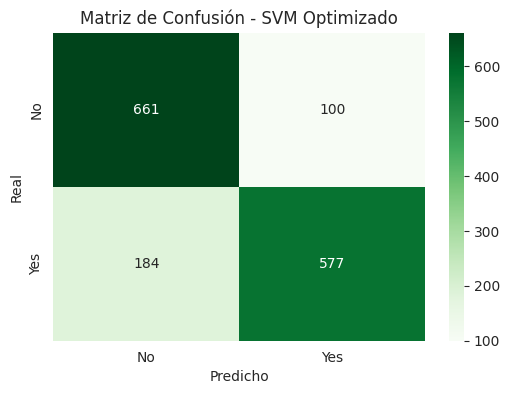

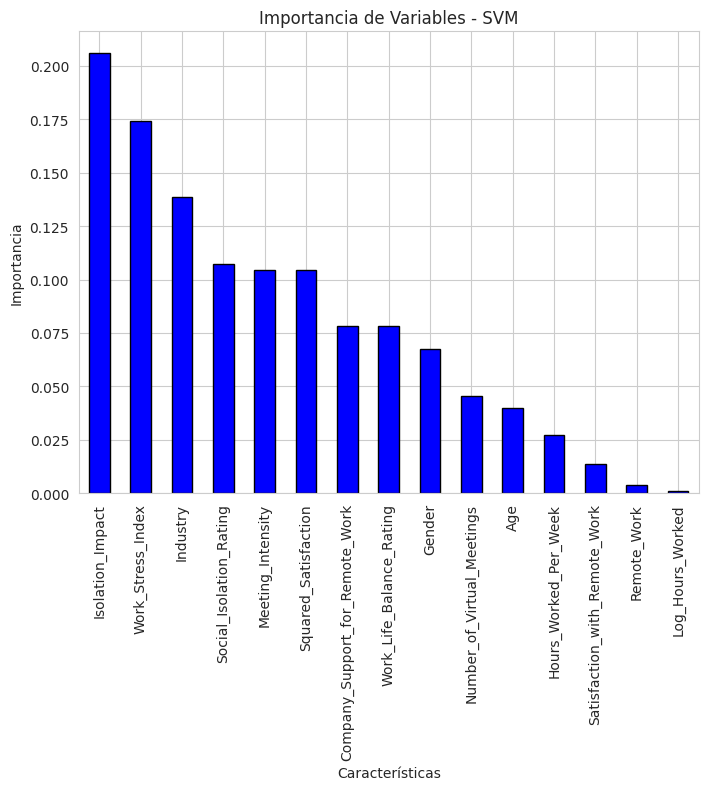

Modelo SVM optimizado evaluado con importancia de variables.


In [15]:
# CARGAMOS LIBRERÍAS NECESARIAS Y DATASET
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEGÓRICAS A NUMÉRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Verificamos si hay más variables categóricas en X y las convertimos
target_vars = ['Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating',
               'Company_Support_for_Remote_Work', 'Hours_Worked_Per_Week',
               'Number_of_Virtual_Meetings', 'Satisfaction_with_Remote_Work', 'Gender', 'Industry', 'Age']

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# CREACIÓN DE VARIABLES DERIVADAS
df['Work_Stress_Index'] = df['Hours_Worked_Per_Week'] * df['Work_Life_Balance_Rating']
df['Isolation_Impact'] = df['Social_Isolation_Rating'] * df['Work_Life_Balance_Rating']
df['Meeting_Intensity'] = df['Number_of_Virtual_Meetings'] / (df['Hours_Worked_Per_Week'] + 1)
df['Log_Hours_Worked'] = np.log(df['Hours_Worked_Per_Week'].clip(lower=1))
df['Log_Hours_Worked'].fillna(df['Log_Hours_Worked'].median(), inplace=True)
df['Squared_Satisfaction'] = df['Satisfaction_with_Remote_Work'] ** 2

# Actualizamos lista de variables predictoras
target_vars.extend(['Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked', 'Squared_Satisfaction'])

# SELECCIÓN DE CARACTERÍSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=3)  # Reducimos la cantidad de folds para acelerar
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Características seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Hiperparámetros optimizados para SVM con una rejilla reducida
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1],
    'kernel': ['rbf']
}

# Grid Search para SVM con más opciones
svm_grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para SVM:", svm_grid.best_params_)
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Evaluamos el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"Accuracy del modelo SVM optimizado: {accuracy_svm:.2f}")
print("\nMatriz de Confusión - SVM:")
print(conf_matrix_svm)
print("\nReporte de Clasificación - SVM:")
print(report_svm)

# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVM Optimizado")
plt.show()

# Importancia de variables con Permutation Importance
perm_importance = permutation_importance(best_svm, X_test, y_test, scoring='accuracy')
feature_importance = pd.Series(perm_importance.importances_mean, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Importancia de Variables - SVM")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.show()

print("Modelo SVM optimizado evaluado con importancia de variables.")

📌 Isolation_Impact
🔹 ¿Qué mide?

Se creó como una combinación del nivel de aislamiento social y el equilibrio entre vida y trabajo.
🔹 ¿Por qué es importante?
Un mayor impacto del aislamiento social combinado con una mala conciliación puede generar más estrés y problemas de salud mental.
Refleja el grado en el que el teletrabajo puede hacer que las personas se sientan desconectadas o sobrecargadas.
📌 Work_Stress_Index
🔹 ¿Qué mide?

La interacción entre las horas trabajadas y el equilibrio vida-trabajo.
🔹 ¿Por qué es importante?
Un alto índice de estrés laboral indica que una persona trabaja muchas horas con poca capacidad de equilibrar su vida personal.
La fatiga y el agotamiento son factores clave en el desarrollo de problemas de salud mental.
📌 Industry
🔹 ¿Qué mide?

Representa el sector en el que trabaja la persona.
🔹 ¿Por qué es importante?
No todas las industrias experimentan el teletrabajo de la misma manera.
Algunos sectores pueden ofrecer más apoyo y flexibilidad que otros.
📌 Meeting_Intensity
🔹 ¿Qué mide?

La cantidad de reuniones virtuales en relación con las horas trabajadas.
🔹 ¿Por qué es importante?
Un alto número de reuniones puede ser agotador y reducir la productividad.
Puede generar más estrés y menos satisfacción con el trabajo remoto.
📌 Squared_Satisfaction
🔹 ¿Qué mide?

El impacto no lineal de la satisfacción con el teletrabajo.
🔹 ¿Por qué es importante?
No todas las personas reaccionan igual al trabajo remoto.
La percepción de satisfacción influye en cómo el teletrabajo afecta la salud mental.
📌 Social_Isolation_Rating
🔹 ¿Qué mide?

Nivel de aislamiento social percibido.
🔹 ¿Por qué es importante?
Sentirse aislado es un factor clave en el deterioro de la salud mental.
Una red social sólida puede mitigar los efectos negativos del teletrabajo.
📌 Company_Support_for_Remote_Work
🔹 ¿Qué mide?

Cuánto apoyo ofrece la empresa al teletrabajo.
🔹 ¿Por qué es importante?
El respaldo de la empresa en términos de flexibilidad y herramientas puede marcar una gran diferencia en la experiencia del teletrabajo.
Puede amortiguar los efectos negativos del aislamiento o el estrés laboral.
📌 Work_Life_Balance_Rating
🔹 ¿Qué mide?

Nivel de satisfacción con la conciliación entre trabajo y vida personal.
🔹 ¿Por qué es importante?
Un bajo equilibrio entre la vida laboral y personal está directamente relacionado con el agotamiento y la ansiedad.

2️⃣ Explicación General
📌 ¿Qué nos dice esto sobre el impacto del teletrabajo en la salud mental?
✔️ El aislamiento social es un factor clave, especialmente cuando no hay un buen equilibrio entre vida y trabajo.
✔️ El estrés laboral y las horas trabajadas juegan un papel importante, lo que sugiere que no es solo el teletrabajo en sí, sino cómo se gestiona.
✔️ La industria y el apoyo de la empresa pueden modificar la experiencia del teletrabajo.
✔️ Las reuniones virtuales pueden ser una fuente de agotamiento, especialmente si se vuelven excesivas o poco productivas.
✔️ La percepción del teletrabajo varía según la persona, por lo que las políticas laborales deben ser flexibles.

Conclusión
El modelo confirma que el impacto del teletrabajo en la salud mental no es uniforme. Depende de múltiples factores, como el estrés laboral, el aislamiento, el apoyo empresarial y la industria. Estos hallazgos pueden ayudar a diseñar políticas laborales más efectivas para minimizar los efectos negativos del teletrabajo en la salud mental. 🚀📊

Características seleccionadas: ['Remote_Work', 'Number_of_Virtual_Meetings', 'Gender', 'Industry', 'Age', 'Hours_Worked_Per_Week', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity']
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores hiperparámetros para SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy del modelo SVM optimizado: 0.82

Matriz de Confusión - SVM: [[614 147]
 [129 632]]

Reporte de Clasificación - SVM:               precision    recall  f1-score   support

           0       0.83      0.81      0.82       761
           1       0.81      0.83      0.82       761

    accuracy                           0.82      1522
   macro avg       0.82      0.82      0.82      1522
weighted avg       0.82      0.82      0.82      1522



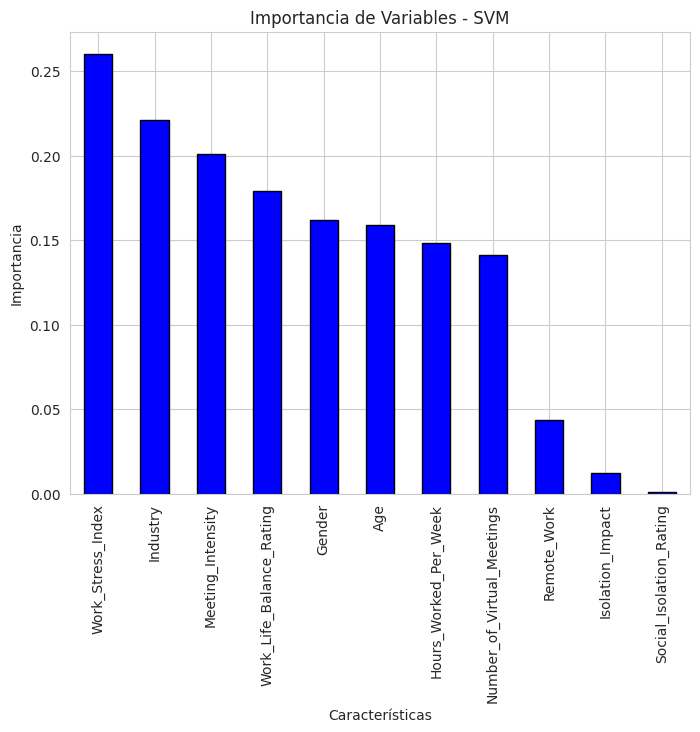

Modelo SVM optimizado evaluado con importancia de variables.
Predicción: Sí con una probabilidad de 0.76


In [16]:
# CARGAMOS LIBRERÍAS NECESARIAS Y DATASET
df = pd.read_csv("dataset_preparado.csv")

# CONVERTIMOS VARIABLES CATEGÓRICAS A NUMÉRICAS
le = LabelEncoder()
df['Health_Disease'] = le.fit_transform(df['Health_Disease'])

# Lista de variables iniciales
target_vars = ['Remote_Work', 'Number_of_Virtual_Meetings', 'Gender', 'Industry', 'Age', 'Hours_Worked_Per_Week', 'Work_Life_Balance_Rating']

for var in target_vars:
    if df[var].dtype == 'object':
        df[var] = le.fit_transform(df[var])

# CREACIÓN DE VARIABLES DERIVADAS
def generar_variables_derivadas(datos):
    datos['Social_Isolation_Rating'] = datos['Number_of_Virtual_Meetings'] * 2 / 20  # Normalización básica
    datos['Work_Stress_Index'] = datos['Hours_Worked_Per_Week'] * datos['Work_Life_Balance_Rating']
    datos['Isolation_Impact'] = datos['Social_Isolation_Rating'] * datos['Work_Life_Balance_Rating']
    datos['Meeting_Intensity'] = datos['Number_of_Virtual_Meetings'] / datos['Hours_Worked_Per_Week']
    datos['Log_Hours_Worked'] = np.log(datos['Hours_Worked_Per_Week'].clip(lower=1))
    return datos

df = generar_variables_derivadas(df)

# Aseguramos que 'Log_Hours_Worked' esté presente en target_vars
target_vars.extend(['Social_Isolation_Rating', 'Work_Stress_Index', 'Isolation_Impact', 'Meeting_Intensity', 'Log_Hours_Worked'])

# SELECCIÓN DE CARACTERÍSTICAS CON RFECV
X = df[target_vars].apply(pd.to_numeric, errors='coerce').fillna(df[target_vars].median())
y = df['Health_Disease']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFECV(rf, step=1, cv=3)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Características seleccionadas:", selected_features.tolist())

X = X[selected_features]

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Hiperparámetros optimizados para SVM con una rejilla reducida
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1],
    'kernel': ['rbf']
}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)

print("Mejores hiperparámetros para SVM:", svm_grid.best_params_)
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Guardamos el modelo entrenado
joblib.dump(best_svm, "svm_model.pkl")

# Evaluamos el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy del modelo SVM optimizado: {accuracy_svm:.2f}")
print("\nMatriz de Confusión - SVM:", confusion_matrix(y_test, y_pred_svm))
print("\nReporte de Clasificación - SVM:", classification_report(y_test, y_pred_svm))

# Importancia de variables con Permutation Importance
perm_importance = permutation_importance(best_svm, X_test, y_test, scoring='accuracy')
feature_importance = pd.Series(perm_importance.importances_mean, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Importancia de Variables - SVM")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.show()

print("Modelo SVM optimizado evaluado con importancia de variables.")

# Función para hacer predicciones con nuevos datos
def predecir_salud_mental(nuevos_datos):
    modelo = joblib.load("svm_model.pkl")
    nuevos_datos_df = pd.DataFrame([nuevos_datos], columns=target_vars)
    nuevos_datos_df = generar_variables_derivadas(nuevos_datos_df)
    nuevos_datos_df = nuevos_datos_df[selected_features]
    prediccion = modelo.predict(nuevos_datos_df)
    probabilidad = modelo.predict_proba(nuevos_datos_df)[:, 1]
    return "Sí" if prediccion[0] == 1 else "No", probabilidad[0]

# Ejemplo de uso
nuevo_ejemplo = {
    'Remote_Work': 1,
    'Number_of_Virtual_Meetings': 5,
    'Gender': 1,
    'Industry': 2,
    'Age': 35,
    'Hours_Worked_Per_Week': 40,
    'Work_Life_Balance_Rating': 3
}

prediccion, probabilidad = predecir_salud_mental(nuevo_ejemplo)
print(f"Predicción: {prediccion} con una probabilidad de {probabilidad:.2f}")


In [17]:
# Diccionario de referencia para la leyenda
legend_info = {
    "Remote_Work": {1: "Sí", 0: "No"},
    "Gender": {0: "Masculino", 1: "Femenino", 2: "No Binario"},
    "Industry": {0: "Tecnología", 1: "Salud", 2: "Educación", 3: "Finanzas", 4: "Retail", 5: "Manufactura", 6: "Otros"},
    "Work_Life_Balance_Rating": {1: "Muy malo", 2: "Malo", 3: "Neutral", 4: "Bueno", 5: "Excelente"}
}

# Aplicación interactiva para ingresar datos
class InteractivePredictionApp:
    def __init__(self):
        self.inputs = {}
        self.index = -1
        self.variables = [
            ("Remote_Work", widgets.Dropdown(options=[(v, k) for k, v in legend_info["Remote_Work"].items()], description="Trabajo Remoto:")),
            ("Number_of_Virtual_Meetings", widgets.IntSlider(min=0, max=20, description="Reuniones Virtuales:")),
            ("Gender", widgets.Dropdown(options=[(v, k) for k, v in legend_info["Gender"].items()], description="Género:")),
            ("Industry", widgets.Dropdown(options=[(v, k) for k, v in legend_info["Industry"].items()], description="Industria:")),
            ("Age", widgets.IntSlider(min=18, max=65, description="Edad:")),
            ("Hours_Worked_Per_Week", widgets.IntSlider(min=20, max=80, description="Horas/Semana:")),
            ("Work_Life_Balance_Rating", widgets.Dropdown(options=[(v, k) for k, v in legend_info["Work_Life_Balance_Rating"].items()], description="Balance Vida-Trabajo:"))
        ]
        self.output = widgets.Output()
        self.next_button = widgets.Button(description="Siguiente", button_style='info')
        self.next_button.on_click(self.next_variable)
        self.show_intro()

    def show_intro(self):
        clear_output()
        display(HTML("""
        <h3>Bienvenido a la Evaluación del Impacto del Teletrabajo en la Salud Mental</h3>
        <p>Introduce los valores solicitados y el sistema calculará la probabilidad de que la persona pueda desarrollar problemas de salud mental en un entorno de trabajo 100% remoto.</p>
        <p>Si la probabilidad es mayor al 50%, se recomendará un modelo híbrido o presencial.</p>
        <h4>Valores esperados:</h4>
        <ul>
            <li><b>Trabajo Remoto:</b> 1 = Sí, 0 = No</li>
            <li><b>Género:</b> 0 = Masculino, 1 = Femenino, 2 = No Binario</li>
            <li><b>Industria:</b> 0 = Tecnología, 1 = Salud, 2 = Educación, 3 = Finanzas, 4 = Retail, 5 = Manufactura, 6 = Otros</li>
            <li><b>Reuniones Virtuales Semanales:</b> Entre 0 y 20</li>
            <li><b>Edad:</b> Entre 18 y 65 años</li>
            <li><b>Horas Trabajadas por Semana:</b> Entre 20 y 80</li>
            <li><b>Balance Vida-Trabajo:</b> 1 = Muy malo, 2 = Malo, 3 = Neutral, 4 = Bueno, 5 = Excelente</li>
        </ul>
        """))
        start_button = widgets.Button(description="Comenzar", button_style='primary')
        start_button.on_click(self.start_survey)
        display(start_button)

    def start_survey(self, _):
        self.index = 0
        self.show_variable()

    def show_variable(self):
        clear_output()
        if self.index < len(self.variables):
            var_name, widget = self.variables[self.index]
            display(widget, self.next_button)
        else:
            self.predict()

    def next_variable(self, _):
        var_name, widget = self.variables[self.index]
        self.inputs[var_name] = widget.value
        self.index += 1
        self.show_variable()

    def predict(self):
        clear_output()
        display(HTML("<h4>Valores ingresados:</h4>"))
        for key, value in self.inputs.items():
            display(HTML(f"<p><b>{key}:</b> {value}</p>"))
        display(HTML("<h4>Calculando predicción...</h4>"))

        # Generar variables derivadas
        input_df = pd.DataFrame([self.inputs])
        input_df['Social_Isolation_Rating'] = input_df['Number_of_Virtual_Meetings'] * 2 / 20  # Normalización básica
        input_df['Work_Stress_Index'] = input_df['Hours_Worked_Per_Week'] * input_df['Work_Life_Balance_Rating']
        input_df['Isolation_Impact'] = input_df['Social_Isolation_Rating'] * input_df['Work_Life_Balance_Rating']
        input_df['Meeting_Intensity'] = input_df['Number_of_Virtual_Meetings'] / input_df['Hours_Worked_Per_Week'].clip(lower=1)

        # Cargar el modelo y predecir
        modelo = joblib.load("svm_model.pkl")
        probabilidad = modelo.predict_proba(input_df)[:, 1][0]

        resultado = f"<h3>Probabilidad de impacto en la salud mental si trabaja 100% remoto: {probabilidad:.2f}</h3>"
        if probabilidad > 0.5:
            resultado += "<h3 style='color:red;'>Se recomienda un trabajo híbrido o presencial.</h3>"
        else:
            resultado += "<h3 style='color:green;'>El teletrabajo parece ser una opción viable.</h3>"

        display(HTML(resultado))

# Iniciar la aplicación interactiva
app = InteractivePredictionApp()

Button(button_style='primary', description='Comenzar', style=ButtonStyle())